In [475]:
import collections
patientdata = []
for filenum in range(1,71):
    patientnum = 'Patient Number ' + str(filenum)
    if(filenum<10):
        with open("C:\\Users\\Ayman\\Documents\\machinelearning\\hw1\\diabetes-data\\data-0"+str(filenum), "r") as file:
            for line in file:
                fourth = str(line)
                date = fourth[0:fourth.index('\t')]
                fourth = fourth.replace(date,'')#Parses through and cuts each line down until needed clms arrive
                fourth = fourth.replace('\t','',1)
                time = fourth[0:fourth.index('\t')]
                fourth = fourth.replace(time,'')
                fourth = fourth.replace('\t','',1)
                third = fourth[0:fourth.index('\t')]
                fourth = fourth.replace(third,'')
                fourth = fourth.replace('\t','',1)
                fourth = fourth.replace('\n','')
                #patientdata.append([patientnum,date,time,third,fourth])
                try:
                    patientdata.append([float(third),float(fourth)])
                except:
                    patientdata.append([float(third),0.0])
    else:#if else statement is used to access all the files because patients <10 have a 0 in front
        with open("C:\\Users\\Ayman\\Documents\\machinelearning\\hw1\\diabetes-data\\data-"+str(filenum), "r") as file:
            for line in file:
                fourth = str(line)
                date = fourth[0:fourth.index('\t')]
                fourth = fourth.replace(date,'')
                fourth = fourth.replace('\t','',1)
                time = fourth[0:fourth.index('\t')]
                fourth = fourth.replace(time,'')#Parses through and cuts each line down until needed clms arrive
                fourth = fourth.replace('\t','',1)
                third = fourth[0:fourth.index('\t')]
                fourth = fourth.replace(third,'')
                fourth = fourth.replace('\t','',1)
                fourth = fourth.replace('\n','')
                try:
                    patientdata.append([float(third),float(fourth)])
                except:
                    patientdata.append([float(third),0.0])
#takes the array all the infomration was inputted into and converts it into a dataframe df
df = pd.DataFrame(patientdata, columns=['3rd','4th'])
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3rd     29330 non-null  float64
 1   4th     29330 non-null  float64
dtypes: float64(2)
memory usage: 458.4 KB
None
                3rd           4th
count  29330.000000  29330.000000
mean      46.428606     78.457705
std       13.453219     93.352247
min        0.000000      0.000000
25%       33.000000      6.000000
50%       48.000000     20.000000
75%       60.000000    140.000000
max       72.000000    501.000000


In [303]:
print(df.duplicated().sum())
for col in df.columns:#EDA
    print(f"{col}:{df[col].unique()}")

26963
3rd:[58. 33. 34. 62. 48. 65. 60. 35. 56. 64. 61. 67. 63. 57. 72. 68. 69. 59.
 71. 70. 66.  4. 36.  0.]
4th:[100.    9.   13.  119.    7.  123.  216.   10.    2.  211.  257.   11.
 129.  239.   14.    4.  340.    5.   67.  206.  288.   77.  228.  259.
 256.    8.  109.   96.  200.  128.    0.  192.  263.   81.  179.   88.
 185.  104.   86.  163.  147.  207.  305.  151.   85.  133.   63.  183.
 282.   91.  229.  121.  251.  135.   87.  255.  343.   97.  136.   82.
 110.  236.  175.  108.  300.   76.   65.   43.  130.    6.  182.  117.
  75.   69.  201.  244.  125.   92.  122.  162.  270.  297.  148.   79.
 246.  165.  149.  232.  312.  115.  180.  295.   15.  220.   64.   94.
 273.  240.  217.  187.    3.   46.  127.  313.  102.  134.  103.  120.
 227.   16.  105.  287.  113.  142.  173.   70.  153.  141.  146.  202.
 111.  212.  171.  107.   35.  156.  106.   55.  204.   74.  233.  194.
 159.  164.   72.  139.   68.  262.  126.  152.   66.  269.  184.  219.
  84.  132.  172.  112.

In [246]:
df["3rd"].unique()#EDA for unique vals


array([58., 33., 34., 62., 48., 65., 60., 35., 56., 64., 61., 67., 63.,
       57., 72., 68., 69., 59., 71., 70., 66.,  4., 36.,  0.])

In [247]:
df["4th"].unique()#EDA for unique vals

array([100. ,   9. ,  13. , 119. ,   7. , 123. , 216. ,  10. ,   2. ,
       211. , 257. ,  11. , 129. , 239. ,  14. ,   4. , 340. ,   5. ,
        67. , 206. , 288. ,  77. , 228. , 259. , 256. ,   8. , 109. ,
        96. , 200. , 128. ,   0. , 192. , 263. ,  81. , 179. ,  88. ,
       185. , 104. ,  86. , 163. , 147. , 207. , 305. , 151. ,  85. ,
       133. ,  63. , 183. , 282. ,  91. , 229. , 121. , 251. , 135. ,
        87. , 255. , 343. ,  97. , 136. ,  82. , 110. , 236. , 175. ,
       108. , 300. ,  76. ,  65. ,  43. , 130. ,   6. , 182. , 117. ,
        75. ,  69. , 201. , 244. , 125. ,  92. , 122. , 162. , 270. ,
       297. , 148. ,  79. , 246. , 165. , 149. , 232. , 312. , 115. ,
       180. , 295. ,  15. , 220. ,  64. ,  94. , 273. , 240. , 217. ,
       187. ,   3. ,  46. , 127. , 313. , 102. , 134. , 103. , 120. ,
       227. ,  16. , 105. , 287. , 113. , 142. , 173. ,  70. , 153. ,
       141. , 146. , 202. , 111. , 212. , 171. , 107. ,  35. , 156. ,
       106. ,  55. ,

In [248]:
df["3rd"].value_counts()

3rd
33.0    9518
34.0    3830
58.0    3518
62.0    3160
60.0    2771
48.0    1883
35.0    1053
57.0     990
64.0     904
65.0     331
67.0     326
63.0     219
66.0     154
70.0     139
56.0     119
71.0      98
72.0      94
69.0      68
61.0      66
68.0      34
0.0       33
59.0      20
4.0        1
36.0       1
Name: count, dtype: int64

In [249]:
df["4th"].value_counts()

4th
6.0      2043
0.0      1408
3.0      1200
4.0      1174
2.0      1070
         ... 
421.0       1
472.0       1
455.0       1
403.0       1
444.0       1
Name: count, Length: 446, dtype: int64

In [250]:
df.isnull().sum()

3rd    0
4th    0
dtype: int64

In [251]:
df

,3rd,4th
0,58.0,100.0
1,33.0,9.0
2,34.0,13.0
3,62.0,119.0
4,33.0,7.0
...,...,...
29325,33.0,1.0
29326,34.0,7.0
29327,34.0,7.0
29328,34.0,7.0


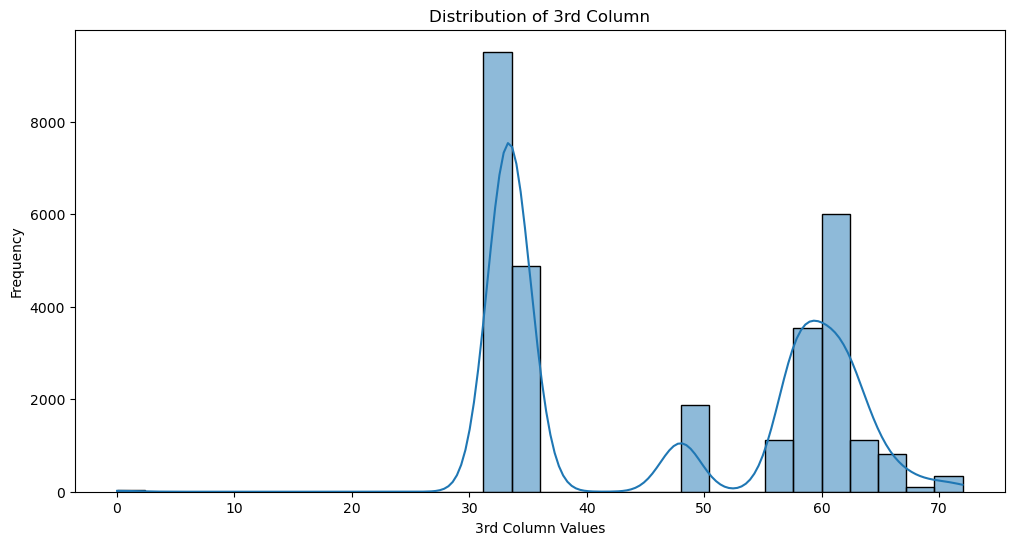

In [382]:
import matplotlib.pyplot as mp
import seaborn as sns

# Visualizing the distribution of 3rd column
mp.figure(figsize=(12, 6))
sns.histplot(df['3rd'], bins=30, kde=True)
mp.title('Distribution of 3rd Column')
mp.xlabel('3rd Column Values')
mp.ylabel('Frequency')
mp.show()


In [410]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sb

#uses the library to create testing, validation, and training sets 
x = df.drop('3rd', axis=1)
y = df['3rd']

x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.75, random_state=42)




In [457]:
import numpy as np
from collections import Counter

def distance(x1, x2):
    try:
        x1 = np.asarray(x1, dtype=np.float64)
    except:
        x1 = 0.0
    x2 = np.asarray(x2, dtype=np.float64)
    distancee = np.sqrt(np.sum((x1 - x2)**2))
    return distancee
#knn implementation 
class knn:
    def __init__(self, k = 3):
        self.k = k
    
    def fit(self, X, y):
        self.Xtrain = X
        self.ytrain = y
    
    def predict(self, X):
        prediction = [self.predicthelper(x) for x in X]
        return prediction

    def predicthelper(self, x):
        distances = [distance(x, xtrain) for xtrain in self.Xtrain]
        kindex = np.argsort(distances)[:self.k]
        #helper is used in each iteration to find closest neighbords
        knearest = [self.ytrain.iloc[xx] if xx in self.ytrain.index else None for xx in kindex]

        mostcommon = Counter(knearest).most_common()  
        return mostcommon[0][0]
    

In [2]:
some = knn(k=5)
some.fit(xtrain,ytrain)
predictions = some.predict(xtest)
print(predictions)

NameError: name 'knn' is not defined

ValueError: x and y must have same first dimension, but have shapes (5,) and (3,)

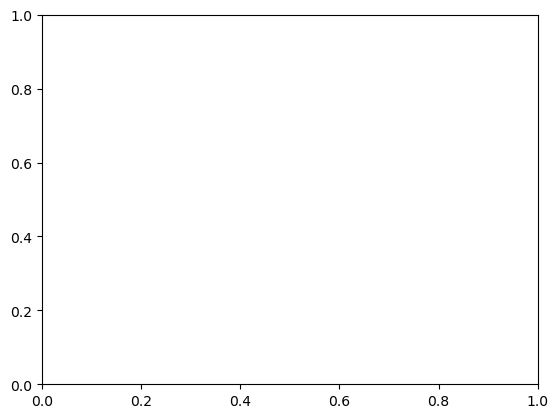

In [472]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
kval = [1,2,3,4,5]
accval = []
def metrics(true, pred):
    accuracy = accuracy_score(true.values,pred)
    recall = recall_score(true,pred,average = 'weighted')
    f1weight = f1_score(true,pred,average = 'weighted')
    f1macro = f1_score(true,pred,average = 'macro')
    rocauc = roc_auc_score(true,pred)
    metrics ={'accuracy' : accuracy, 'recall' : recall, 'weighted f1' : f1weight, 'macro f1' : f1macro, 'rocauc' : rocauc}
    return metrics

for k in kval:
    model = knn(k = k)
    model.fit(xtrain,ytrain)
    ypredict = model.predict(xval)
    metric = metrics(yval,ypredict)
    accval.append(metric['accuracy'])
#attempted to plot results here
plt.plot(k_values, accval, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()